# SI 370: Correlation and Regression

Correlation does not imply causation!

![](resources/piratesvstemp.png)

http://mpastell.com/2013/04/19/python_regression/

## Wine quality redux
![](resources/vinho.png)
https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009/home

Warnings usually just cause us unnessary stress. The next code block silences warnings. 
 

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
wine = pd.read_csv('data/winequality-red.csv')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Remember creating a pairplot for the wine dataset?

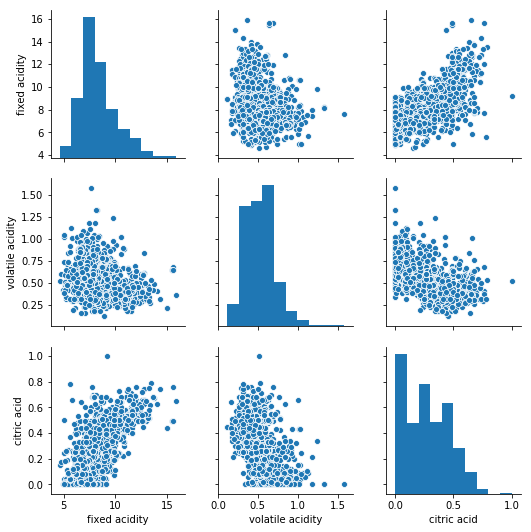

In [5]:
sns.pairplot(wine,vars = ['fixed acidity','volatile acidity','citric acid'])

We can also look at the correlation between those variables.  From [Wikipedia](https://en.wikipedia.org/wiki/Correlation_and_dependence):
> In the broadest sense correlation is any statistical association, though in common usage it most often refers to how close two variables are to having a linear relationship with each other...
> Correlations are useful because they can indicate a predictive relationship that can be exploited in practice.

![](resources/correlation1-1.png)

In [6]:
wine.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


A heatmap is a really useful visualization technique for large correlation matrices:

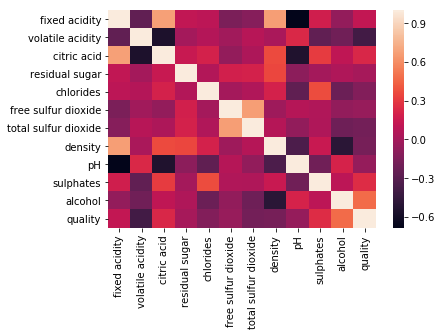

In [7]:
sns.heatmap(wine.corr())

We can also use a different type of color palette to highlight the differences:

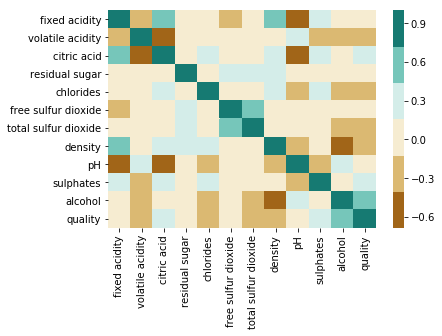

In [8]:
sns.heatmap(wine.corr(),cmap=sns.color_palette("BrBG"))

### Q1: List the 5 largest correlations in the wine quality dataset

In [20]:
c = wine.corr().abs()
s = c.unstack()
so = s.sort_values(ascending=False)
so[so < 1][:10]

fixed acidity         pH                      0.682978
pH                    fixed acidity           0.682978
citric acid           fixed acidity           0.671703
fixed acidity         citric acid             0.671703
                      density                 0.668047
density               fixed acidity           0.668047
free sulfur dioxide   total sulfur dioxide    0.667666
total sulfur dioxide  free sulfur dioxide     0.667666
volatile acidity      citric acid             0.552496
citric acid           volatile acidity        0.552496
dtype: float64

The 5 largest correlations are:
- fixed acidity and pH
- citric acid and fixed acidity
- fixed acidity and density
- free sulfur dioxide and total sulfur dioxide
- volatile acidity and citric acid 

Above I listed the top 10 in the list, but we can see there are several repeats with the variables in different order.

### End Q1

Recall we used JointGrid to create a regplot and distplot on the same plot.  We can take a 
closer look at that now:

In [21]:
from scipy import stats

In [22]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


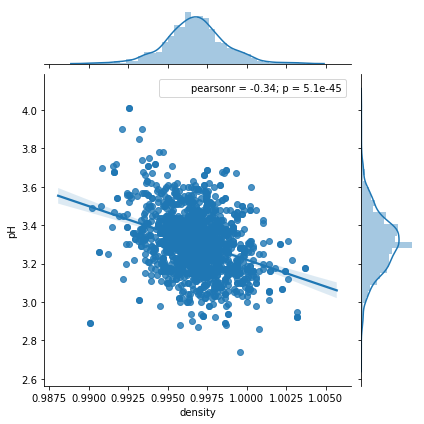

In [23]:
g = sns.JointGrid(data=wine,x='density',y='pH')
g = g.plot(sns.regplot, sns.distplot)
g = g.annotate(stats.pearsonr)

### Q2: Create a similar JointGrid-based plot for "free sulphur dioxide" vs. "total sulphur dioxide".

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


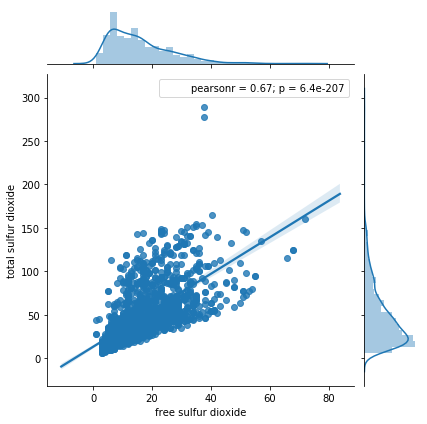

In [25]:
# x is the explanatory, y is the outcome 
# x is the independent, y is the dependent
g = sns.JointGrid(data=wine,x='free sulfur dioxide',y='total sulfur dioxide')
g = g.plot(sns.regplot, sns.distplot)
g = g.annotate(stats.pearsonr)

## Ordinary Least Squares (OLS) Regression

We can get a lot more detail about the regression model by using statsmodels

In [28]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

statsmodels uses R-Style formulas: y ~ x1 + x2 + x3 + ...

1. y represents the outcome/dependent variable
2. x1, x2, x3, etc represent explanatory/independent variables 

In [29]:
model0 = smf.ols(" pH ~ density", data=wine).fit()
model0.summary()
# r squared tells us how much of this data is explained by the model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     pH   R-squared:                       0.117
Model:                            OLS   Adj. R-squared:                  0.116
Method:                 Least Squares   F-statistic:                     211.1
Date:                Tue, 08 Oct 2019   Prob (F-statistic):           5.12e-45
Time:                        13:15:49   Log-Likelihood:                 818.29
No. Observations:                1599   AIC:                            -1633.
Df Residuals:                    1597   BIC:                            -1622.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     31.1716      1.917     16.256      0.000      27.411      34.933
density      -27.9515      1.924    -14.530      0.000     -31.725     -24.178
==============================================================================
Omnibus:                       25.164   Durbin-Watson:                   1.613
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.630
Skew:                           0.094   Prob(JB):                     5.53e-10
Kurtosis:                       3.778   Cond. No.                     1.06e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In the above example, the $r^2$ value is 0.117, which means the model explains about 11.7% of the variance (which isn't great).  However, the model is statistically significant (the p-value, called "Prob (F-statistic)" in the output, is less than 0.05).
The estimates for the parameters of the model are also statistically significant, which means we can use the equation:

pH = -27.9515 * density + 31.1716

to predict the value of pH given a value for density.

What happens when the series name has a space (or other special character) in it?  Use the 'Q' function to "Quote" the name:

In [30]:
model1 = smf.ols(" Q('fixed acidity') ~ density", data=wine).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Q('fixed acidity')   R-squared:                       0.446
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                     1287.
Date:                Tue, 08 Oct 2019   Prob (F-statistic):          3.07e-207
Time:                        13:19:47   Log-Likelihood:                -2682.5
No. Observations:                1599   AIC:                             5369.
Df Residuals:                    1597   BIC:                             5380.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -605.9599     17.122    -35.391      0.000    -639.543    -572.376
density      616.2845     17.178     35.877      0.000     582.591     649.978
==============================================================================
Omnibus:                      107.325   Durbin-Watson:                   1.479
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              130.211
Skew:                           0.643   Prob(JB):                     5.31e-29
Kurtosis:                       3.549   Cond. No.                     1.06e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Q3: Create a regression model with "total sulfur dioxide" as the dependent variable and "free sulfur dioxide" as the predictor variable.
Report the following:
1. Coefficient of determination (i.e. $r^2$)
2. Whether the regression is statistically significant
3. An estimate for the value of "total sulfur dioxide" when the value of "free sulfur dioxide" is 60.

In [31]:
model3 = smf.ols(" Q('total sulfur dioxide') ~ Q('free sulfur dioxide')", data=wine).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     Q('total sulfur dioxide')   R-squared:                       0.446
Model:                                   OLS   Adj. R-squared:                  0.445
Method:                        Least Squares   F-statistic:                     1285.
Date:                       Tue, 08 Oct 2019   Prob (F-statistic):          6.40e-207
Time:                               13:28:58   Log-Likelihood:                -7382.4
No. Observations:                       1599   AIC:                         1.477e+04
Df Residuals:                           1597   BIC:                         1.478e+04
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   13.1354      1.114     11.795      0.000      10.951      15.320
Q('free sulfur dioxide')     2.0997      0.059     35.840      0.000       1.985       2.215
==============================================================================
Omnibus:                      621.223   Durbin-Watson:                   1.553
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3163.294
Skew:                           1.767   Prob(JB):                         0.00
Kurtosis:                       8.915   Cond. No.                         34.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The coefficient of determination is 0.446, meaning the model explains almost half of the variance. 

The regression is statistically significant, we can tell this because the probability of hte F-statistic is so small.

When "free sulfur dioxide" is 60, "total sulfur dioxide will be:

y = B0 + B1x

total_sulfur = 13.1354 + 2.0997(free_sulfur)

13.1354 + 2.0997(60) ~=~ 130

## Outlier detection

"Outlier detection" refers to the identification of points that are extreme in value.  They may or may not influence the regression analysis.

Outlier: Large residual (i.e. big differences on the vertical dimension)

Leverage: Extreme value of predictor variable (i.e. big differences on the horizontal dimension)

Influence: Removing observation substantially changes estimate of coefficients


Cook's distance measures the effect of deleting a given observation.  Rows with high values of Cook's distance are worth taking a closer look at.

Consider the following cases, drawn from 

http://songhuiming.github.io/pages/2016/11/27/linear-regression-in-python-outliers-leverage-detect/

In the first case, there are no notable points:

In [32]:
np.random.seed(0)
x1 = np.random.normal(20, 3, 20)
y0 = 5 + 0.5 * x1
y1 = 5 + 0.5 * x1 + np.random.normal(0, 1, 20)

lm = sm.OLS(y1, sm.add_constant(x1)).fit()
print("The rsquared value is " + str(lm.rsquared))


The rsquared value is 0.5759696028216694


In [33]:
x1

array([25.29215704, 21.20047163, 22.93621395, 26.7226796 , 25.60267397,
       17.06816636, 22.85026525, 19.54592838, 19.69034344, 21.23179551,
       20.43213071, 24.36282052, 22.28311318, 20.36502505, 21.3315897 ,
       21.00102298, 24.48223722, 19.38452521, 20.9392031 , 17.43771278])

In [34]:
y0 # this is the actual?

array([17.64607852, 15.60023581, 16.46810698, 18.3613398 , 17.80133699,
       13.53408318, 16.42513263, 14.77296419, 14.84517172, 15.61589775,
       15.21606536, 17.18141026, 16.14155659, 15.18251252, 15.66579485,
       15.50051149, 17.24111861, 14.6922626 , 15.46960155, 13.71885639])

In [35]:
y1

array([15.0930887 , 16.25385441, 17.33254318, 17.61917478, 20.07109161,
       12.07971751, 16.47089114, 14.58578034, 16.37795094, 17.08525652,
       15.37101278, 17.55957278, 15.25377084, 13.20171606, 15.3178827 ,
       15.65686046, 18.47140929, 15.89464245, 15.08227474, 13.41655364])

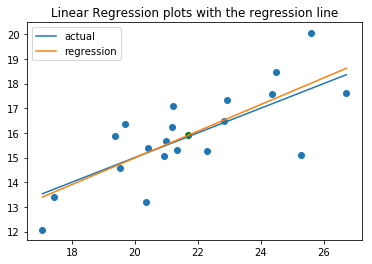

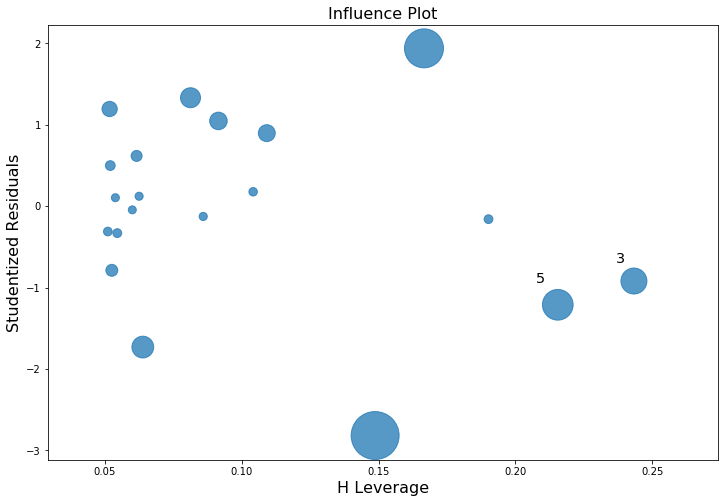

In [39]:

plt.scatter(np.sort(x1), y1[np.argsort(x1)])
plt.scatter(np.mean(x1), np.mean(y1), color = "green")
plt.plot(np.sort(x1), y0[np.argsort(x1)], label = "actual")
plt.plot(np.sort(x1), lm.predict()[np.argsort(x1)], label = "regression")
plt.title("Linear Regression plots with the regression line")
plt.legend()

fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(lm, alpha  = 0.00005, ax = ax, criterion="cooks")

# actual is calculated using the means
# regression is the best estimate without looking at the means

High leverage point, no outliers

In [42]:
y2

array([15.0930887 , 16.25385441, 17.33254318, 17.61917478, 20.07109161,
       12.07971751, 16.47089114, 14.58578034, 16.37795094, 17.08525652,
       15.37101278, 17.55957278, 15.25377084, 13.20171606, 15.3178827 ,
       15.65686046, 18.47140929, 15.89464245, 15.08227474, 13.41655364,
       20.8       ])

In [43]:
np.mean(y2)

16.142621183719207

The rsquared value is 0.6835270587597564


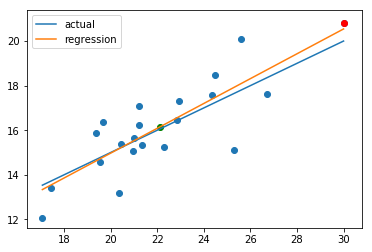

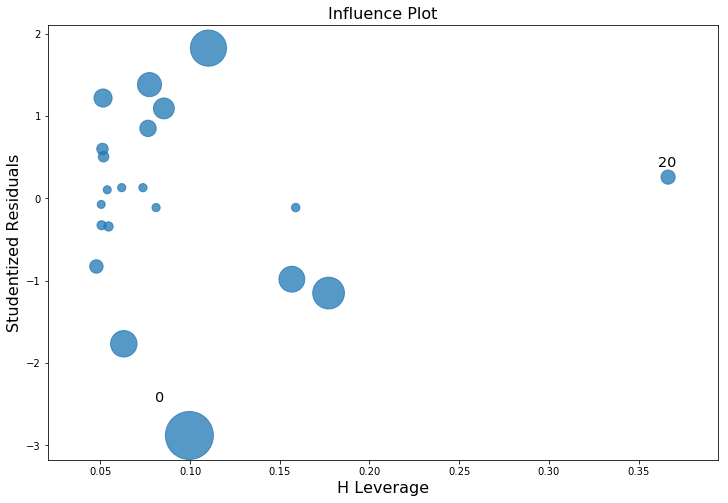

In [41]:
x2 = np.r_[x1, 30]
y2 = np.r_[y1, 20.8]
y20 = np.r_[y0, 20]

lm2 = sm.OLS(y2, sm.add_constant(x2)).fit()
print("The rsquared value is " + str(lm2.rsquared))

plt.scatter(np.sort(x2), y2[np.argsort(x2)])
plt.scatter(30, 20.8, color = "red")
plt.scatter(np.mean(x2), np.mean(y2), color = "green")
plt.plot(np.sort(x2), y20[np.argsort(x2)], label = "actual")
plt.plot(np.sort(x2), lm2.predict()[np.argsort(x2)], label = "regression")
plt.legend()
plt.plot()

fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(lm2, ax= ax, criterion="cooks")

Outlier, no leverage

The rsquared value is 0.2737752662801516


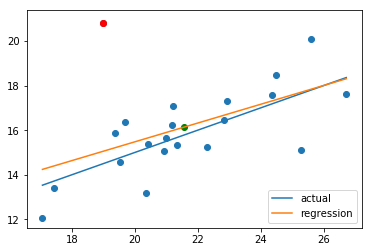

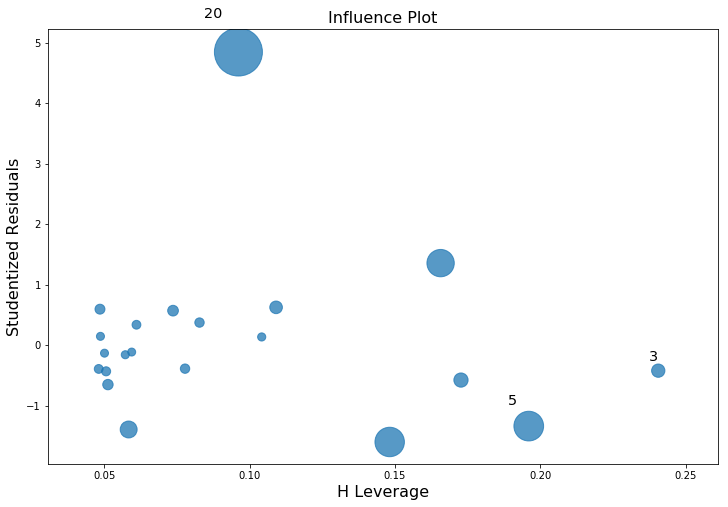

In [44]:
x3 = np.r_[x1, 19]
y3 = np.r_[y1, 20.8]
y30 = np.r_[y0, 5 + .5 * 19]

lm3 = sm.OLS(y3, sm.add_constant(x3)).fit()
print("The rsquared value is " + str(lm3.rsquared))

plt.scatter(np.sort(x3), y3[np.argsort(x3)])
plt.scatter(19, 20.8, color = "red")
plt.scatter(np.mean(x3), np.mean(y3), color = "green")
plt.plot(np.sort(x3), y30[np.argsort(x3)], label = "actual")
plt.plot(np.sort(x3), lm3.predict()[np.argsort(x3)], label = "regression")
plt.legend()
plt.plot()

fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(lm3, ax= ax, criterion="cooks")

Outlier and leverage point

The rsquared value is 0.028865535723010205


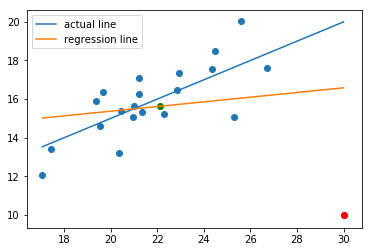

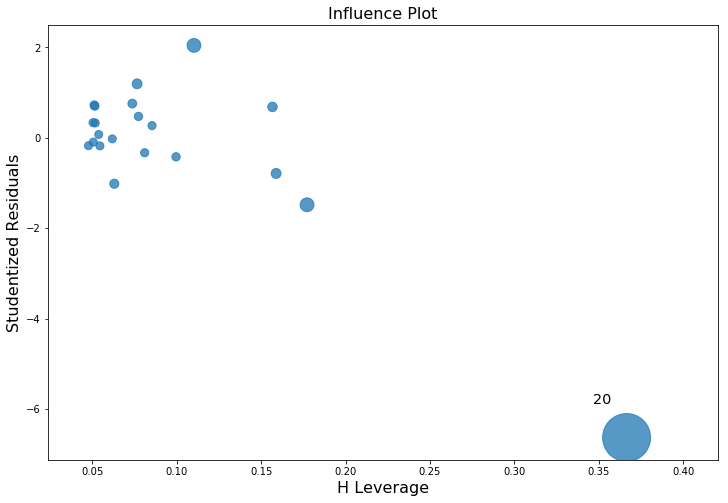

In [45]:
x4 = np.r_[x1, 30]
y4 = np.r_[y1, 10]
y40 = np.r_[y0, 20]

lm4 = sm.OLS(y4, sm.add_constant(x4)).fit()
print("The rsquared value is " + str(lm4.rsquared))

plt.scatter(np.sort(x4), y4[np.argsort(x4)])
plt.scatter(30, 10, color = "red")
plt.scatter(np.mean(x4), np.mean(y4), color = "green")
plt.plot(np.sort(x4), y40[np.argsort(x4)], label = "actual line")
plt.plot(np.sort(x4), lm4.predict()[np.argsort(x4)], label = "regression line")
plt.legend()
plt.plot()

fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(lm4, ax= ax, criterion="cooks")

Let's look at Anscombe's Quartet:

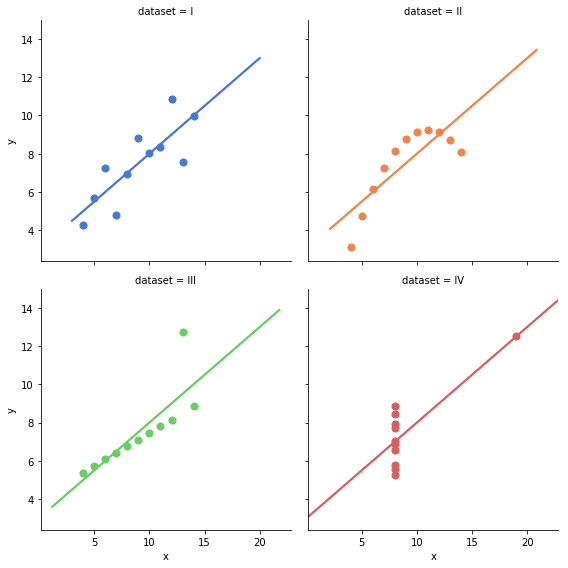

In [46]:
anscombe = sns.load_dataset("anscombe")

# Show the results of a linear regression within each dataset
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=anscombe,
           col_wrap=2, ci=None, palette="muted", height=4,
           scatter_kws={"s": 50, "alpha": 1})

In [47]:
anscombe.sample(5)

,dataset,x,y
29,III,4.0,5.39
37,IV,8.0,8.47
10,I,5.0,5.68
31,III,7.0,6.42
8,I,12.0,10.84


In [48]:
anscombe_1 = anscombe[anscombe.dataset == 'I']
anscombe_2 = anscombe[anscombe.dataset == 'II']
anscombe_3 = anscombe[anscombe.dataset == 'III']
anscombe_4 = anscombe[anscombe.dataset == 'IV']

In [49]:
%matplotlib inline

The rsquared value is 0.6665424595087751


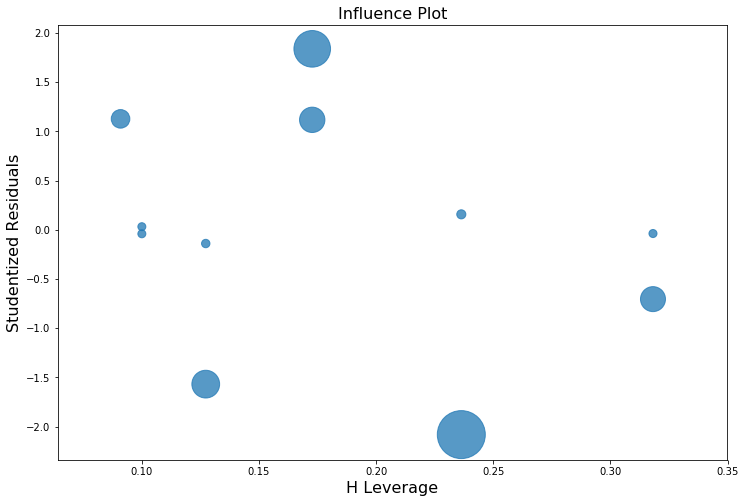

In [50]:
anscombe_1_lm = smf.ols('y ~ x',anscombe_1).fit()
print("The rsquared value is " + str(anscombe_1_lm.rsquared))
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(anscombe_1_lm, ax= ax, criterion="cooks",alpha=0.05) 


The rsquared value is 0.6662420337274844


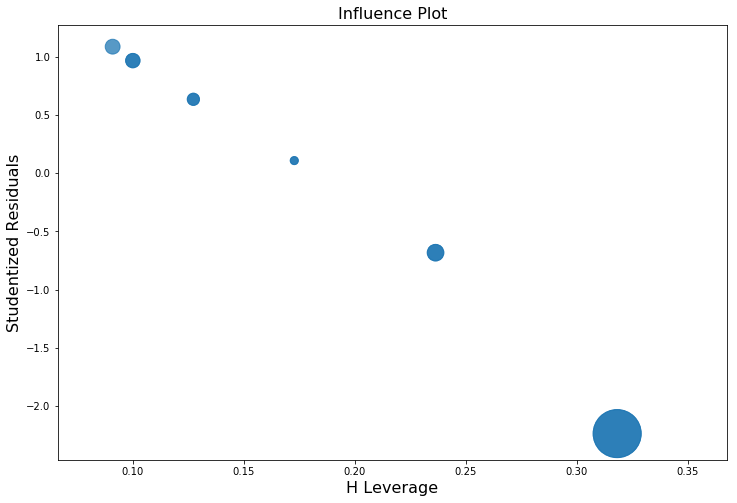

In [51]:
anscombe_2_lm = smf.ols('y ~ x',anscombe_2).fit()
print("The rsquared value is " + str(anscombe_2_lm.rsquared))
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(anscombe_2_lm, ax= ax, criterion="cooks",alpha=.05)                            

The rsquared value is 0.6663240410665592


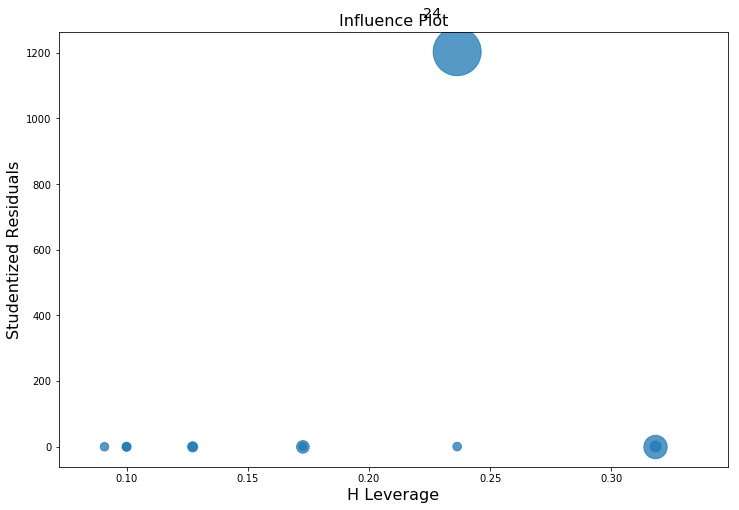

In [52]:
anscombe_3_lm = smf.ols('y ~ x',anscombe_3).fit()
print("The rsquared value is " + str(anscombe_3_lm.rsquared))
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(anscombe_3_lm, ax= ax, criterion="cooks",alpha=0.05)

The rsquared value is 0.6667072568984653


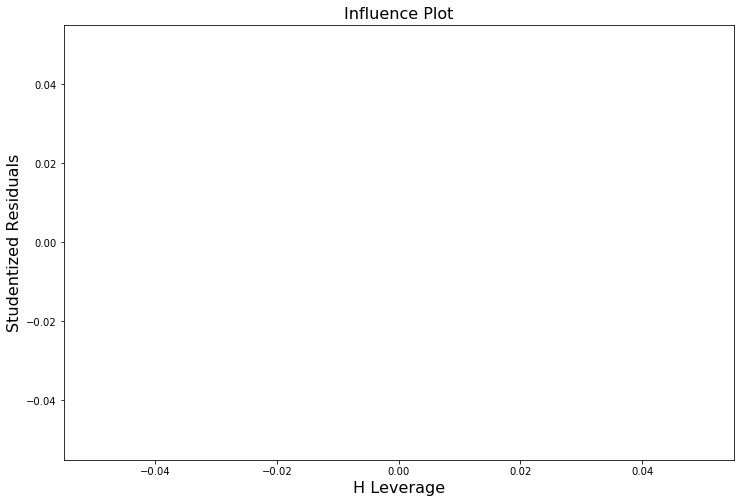

In [53]:
anscombe_4_lm = smf.ols('y ~ x',anscombe_4).fit()

print("The rsquared value is " + str(anscombe_4_lm.rsquared))
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(anscombe_4_lm, ax= ax, criterion="cooks",alpha=0.05)                                  

In [54]:
infl = anscombe_4_lm.get_influence()
sm_fr = infl.summary_frame()
sm_fr

,dfb_Intercept,dfb_x,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
33,-0.068269,0.034276,0.007165,-0.359128,0.1,-0.119709,-0.341042,-0.113681
34,-0.213528,0.107207,0.062259,-1.058617,0.1,-0.352872,-1.066693,-0.355564
35,0.116537,-0.058510,0.020321,0.604802,0.1,0.201601,0.582166,0.194055
36,0.347337,-0.174389,0.136718,1.568733,0.1,0.522911,1.735145,0.578382
37,0.260293,-0.130686,0.087238,1.253110,0.1,0.417703,1.300313,0.433438
38,0.006279,-0.003153,0.000061,0.033268,0.1,0.011089,0.031368,0.010456
39,-0.325052,0.163200,0.123947,-1.493666,0.1,-0.497889,-1.623818,-0.541273
40,2.574931,-3.070410,NaN,NaN,1.0,NaN,NaN,NaN
41,-0.254319,0.127687,0.083944,-1.229225,0.1,-0.409742,-1.270469,-0.423490
42,0.151490,-0.076059,0.033403,0.775410,0.1,0.258470,0.756779,0.252260


We can also extract the Cook's Distance values and their associated p-values from the influence object:

In [55]:
infl = anscombe_3_lm.get_influence()

c,p = infl.cooks_distance

and create a DataFrame with the results

In [56]:
df = pd.DataFrame.from_dict({'cooks_distance':c,'pvalue':p})

In [57]:
df

,cooks_distance,pvalue
0,0.011765,0.988319
1,0.002141,0.997861
2,1.392849,0.297161
3,0.005473,0.994545
4,0.025984,0.974424
5,0.300571,0.747547
6,0.000518,0.999483
7,0.033817,0.966870
8,0.059536,0.942570
9,0.000355,0.999645


Note that we could sort the above in various, helpful ways.

In [58]:
anscombe_3

,dataset,x,y
22,III,10.0,7.46
23,III,8.0,6.77
24,III,13.0,12.74
25,III,9.0,7.11
26,III,11.0,7.81
27,III,14.0,8.84
28,III,6.0,6.08
29,III,4.0,5.39
30,III,12.0,8.15
31,III,7.0,6.42


### Q4: In the Anscombe III dataset, what are the x- and y-values of the row with the highest Cook's distance?

x = 13.0, y = 12.74